In [55]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mc

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

import math
import random

import datetime
import time

import operator

In [56]:
# function to give correct date for making a correct to the github repo of latest data

def getYesterday():
    yesterday = datetime.date.today() - datetime.timedelta(days=1)
    
# returning a 0 at the beginning of the string
# because the repository stores dates as 06 for the month of June for example
    return "{}-{}-{}".format(yesterday.month, yesterday.day, yesterday.year) if yesterday.month >= 10 else "0{}-{}-{}".format(yesterday.month, yesterday.day, yesterday.year) 

In [57]:
# load data sets

confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

# technically getting data from yesterday, however this is to avoid a http error
# the repository only updates right before midnight
latest = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{}.csv'.format(getYesterday()))

In [58]:
# retrieve data from respective columns by date

columns = confirmed.keys()

confirmed_cases_by_date = confirmed.loc[ : , columns[4] : columns[-1]]

deaths_by_date = deaths.loc[ : , columns[4] : columns[-1]]

recoveries_by_date = recovered.loc[ : , columns[4] : columns[-1]]

In [59]:
# initialize dictionaries to store data

dates = confirmed_cases_by_date.keys()

total = {}
total['cases'] = []
total['daily cases'] = []
total['deaths'] = []
total['daily deaths'] = []
total['recovered'] = []
total['daily recovered'] = []
total['active'] = []
mortality_rate = []
recovery_rate = []

china = {}
china['cases'] = []
china['daily cases'] = []
china['deaths'] = []
china['daily deaths'] = []
china['recovered'] = []
china['daily recovered'] = []

italy = {}
italy['cases'] = []
italy['daily cases'] = []
italy['deaths'] = []
italy['daily deaths'] = []
italy['recovered'] = []
italy['daily recovered'] = []

us = {}
us['cases'] = []
us['daily cases'] = []
us['deaths'] = []
us['daily deaths'] = []
us['recovered'] = []
us['daily recovered'] = []

spain = {}
spain['cases'] = []
spain['daily cases'] = []
spain['deaths'] = []
spain['daily deaths'] = []
spain['recovered'] = []
spain['daily recovered'] = []

france = {}
france['cases'] = []
france['daily cases'] = []
france['deaths'] = []
france['daily deaths'] = []
france['recovered'] = []
france['daily recovered'] = []

germany = {}
germany['cases'] = []
germany['daily cases'] = []
germany['deaths'] = []
germany['daily deaths'] = []
germany['recovered'] = []
germany['daily recovered'] = []

uk = {}
uk['cases'] = []
uk['daily cases'] = []
uk['deaths'] = []
uk['daily deaths'] = []
uk['recovered'] = []
uk['daily recovered'] = []

russia = {}
russia['cases'] = []
russia['daily cases'] = []
russia['deaths'] = []
russia['daily deaths'] = []
russia['recovered'] = []
russia['daily recovered'] = []

india = {}
india['cases'] = []
india['daily cases'] = []
india['deaths'] = []
india['daily deaths'] = []
india['recovered'] = []
india['daily recovered'] = []

In [60]:
# function to populate data fields for country dictionaries

def fillDictionary(listTitle, dataSet):
    
    china[listTitle].append(dataSet[dataSet['Country/Region'] == 'China'][i].sum())
    italy[listTitle].append(dataSet[dataSet['Country/Region'] == 'Italy'][i].sum())
    us[listTitle].append(dataSet[dataSet['Country/Region'] == 'US'][i].sum())
    spain[listTitle].append(dataSet[dataSet['Country/Region'] == 'Spain'][i].sum())
    france[listTitle].append(dataSet[dataSet['Country/Region'] == 'France'][i].sum())
    germany[listTitle].append(dataSet[dataSet['Country/Region'] == 'Germany'][i].sum())
    uk[listTitle].append(dataSet[dataSet['Country/Region'] == 'United Kingdom'][i].sum())
    russia[listTitle].append(dataSet[dataSet['Country/Region'] == 'Russia'][i].sum())
    india[listTitle].append(dataSet[dataSet['Country/Region'] == 'India'][i].sum())

In [61]:
# populate global fields and all fields for countries in data set

for i in dates:
    
    count_confirmed = confirmed_cases_by_date[i].sum()
    count_deaths = deaths_by_date[i].sum()
    count_recoveries = recoveries_by_date[i].sum()
    
    total['cases'].append(count_confirmed)
    total['deaths'].append(count_deaths)
    total['recovered'].append(count_recoveries)    
    total['active'].append(count_confirmed - count_deaths - count_recoveries)
    
    mortality_rate.append(count_deaths / count_confirmed)
    recovery_rate.append(count_recoveries / count_confirmed)
    
    fillDictionary('cases', confirmed)
    fillDictionary('deaths', deaths)
    fillDictionary('recovered', recovered)

In [62]:
# function to return daily increase of cases, deaths, and recovered numbers by country

def dailyIncrease(data):
    
    dailyIncrease = []
    
    for i in data:
        
        dailyIncrease.append(i)
    
    return dailyIncrease

In [63]:
# populate daily fields

total['daily cases'] = dailyIncrease(total['cases'])
china['daily cases'] = dailyIncrease(china['cases'])
italy['daily cases'] = dailyIncrease(italy['cases'])
us['daily cases'] = dailyIncrease(us['cases'])
spain['daily cases'] = dailyIncrease(spain['cases'])
france['daily cases'] = dailyIncrease(france['cases'])
germany['daily cases'] = dailyIncrease(germany['cases'])
uk['daily cases'] = dailyIncrease(uk['cases'])
russia['daily cases'] = dailyIncrease(russia['cases'])
india['daily cases'] = dailyIncrease(india['cases'])

total['daily deaths'] = dailyIncrease(total['deaths'])
china['daily deaths'] = dailyIncrease(china['deaths'])
italy['daily deaths'] = dailyIncrease(italy['deaths'])
us['daily deaths'] = dailyIncrease(us['deaths'])
spain['daily deaths'] = dailyIncrease(spain['deaths'])
france['daily deaths'] = dailyIncrease(france['deaths'])
germany['daily deaths'] = dailyIncrease(germany['deaths'])
uk['daily deaths'] = dailyIncrease(uk['deaths'])
russia['daily deaths'] = dailyIncrease(russia['deaths'])
india['daily deaths'] = dailyIncrease(india['deaths'])

total['daily recovered'] = dailyIncrease(total['recovered'])
china['daily recovered'] = dailyIncrease(china['recovered'])
italy['daily recovered'] = dailyIncrease(italy['recovered'])
us['daily recovered'] = dailyIncrease(us['recovered'])
spain['daily recovered'] = dailyIncrease(spain['recovered'])
france['daily recovered'] = dailyIncrease(france['recovered'])
germany['daily recovered'] = dailyIncrease(germany['recovered'])
uk['daily recovered'] = dailyIncrease(uk['recovered'])
russia['daily recovered'] = dailyIncrease(russia['recovered'])
india['daily recovered'] = dailyIncrease(india['recovered'])


In [64]:
total_days = []

for i in range(len(dates)):
    total_days.append(i)
 
total_days = np.array(total_days).reshape(-1, 1)
total_cases = np.array(total['cases']).reshape(-1, 1)
total_deaths = np.array(total['deaths']).reshape(-1, 1)
total_recovered = np.array(total['recovered']).reshape(-1, 1)

In [65]:
future_days = 50
forecast = []

for i in range(len(dates) + future_days):
    forecast.append(i)

forecast = np.array(forecast).reshape(-1, 1)

adjusted_dates = forecast[ : -50]

In [66]:
start_date = datetime.datetime.strptime('1/22/2020', '%m/%d/%Y')
future_dates = []

for i in range(len(forecast)):
    future_dates.append((start_date + datetime.timedelta(days = i)).strftime('%m/%d/%Y'))

In [67]:
xTrain_confirmed, xTest_confirmed, yTrain_confirmed, yTest_confirmed = train_test_split(total_days, total_cases, test_size=0.25, shuffle=False)

# transform data for polynomial regression

polynomial = PolynomialFeatures(degree=2)

polynomial_xTrain_confirmed = polynomial.fit_transform(xTrain_confirmed)
polynomial_xTest_confirmed = polynomial.fit_transform(xTest_confirmed)
polynomial_forecast = polynomial.fit_transform(forecast)

In [68]:
linear_regression = LinearRegression(normalize=True, fit_intercept=False)
linear_regression.fit(polynomial_xTrain_confirmed, yTrain_confirmed)
y_test_pred = linear_regression.predict(polynomial_xTest_confirmed)
y_pred = linear_regression.predict(polynomial_forecast)

print('mean absolute error: ', mean_absolute_error(y_test_pred, yTest_confirmed))
print('mean squared error: ', mean_squared_error(y_test_pred, yTest_confirmed))

mean absolute error:  466118.5310610654
mean squared error:  252748216116.0186


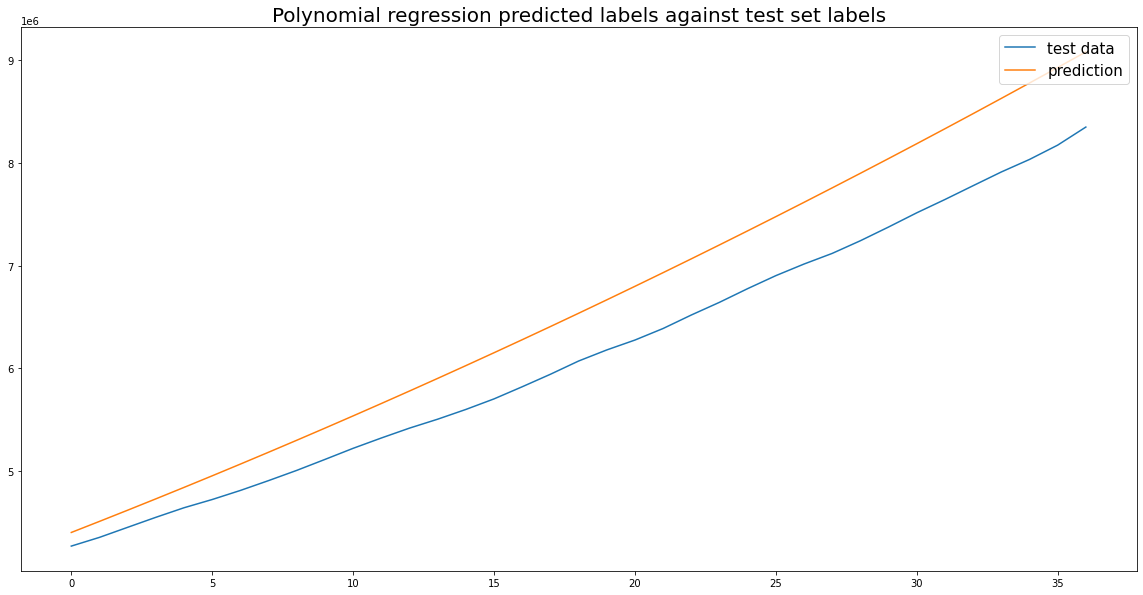

In [69]:
plt.figure(figsize=(20,10))

plt.title('Polynomial regression predicted labels against test set labels', fontsize=20)
plt.plot(yTest_confirmed)
plt.plot(y_test_pred)

plt.legend(['test data', 'prediction'], loc='upper right', fontsize=15)

In [70]:
# svm predictions

svm_confirmed_cases = SVR(shrinking=True, kernel='poly', gamma=0.01, epsilon=1, degree=3, C=0.1)
svm_confirmed_cases.fit(xTrain_confirmed, np.ravel(yTrain_confirmed, order='C'))
y_pred_svm = svm_confirmed_cases.predict(forecast)

In [71]:
y_test_pred_svm = svm_confirmed_cases.predict(xTest_confirmed)

print('mean absolute error: ', mean_absolute_error(y_test_pred_svm, yTest_confirmed))
print('mean squared error: ', mean_squared_error(y_test_pred_svm, yTest_confirmed))

mean absolute error:  449752.3105460378
mean squared error:  237422031517.33493


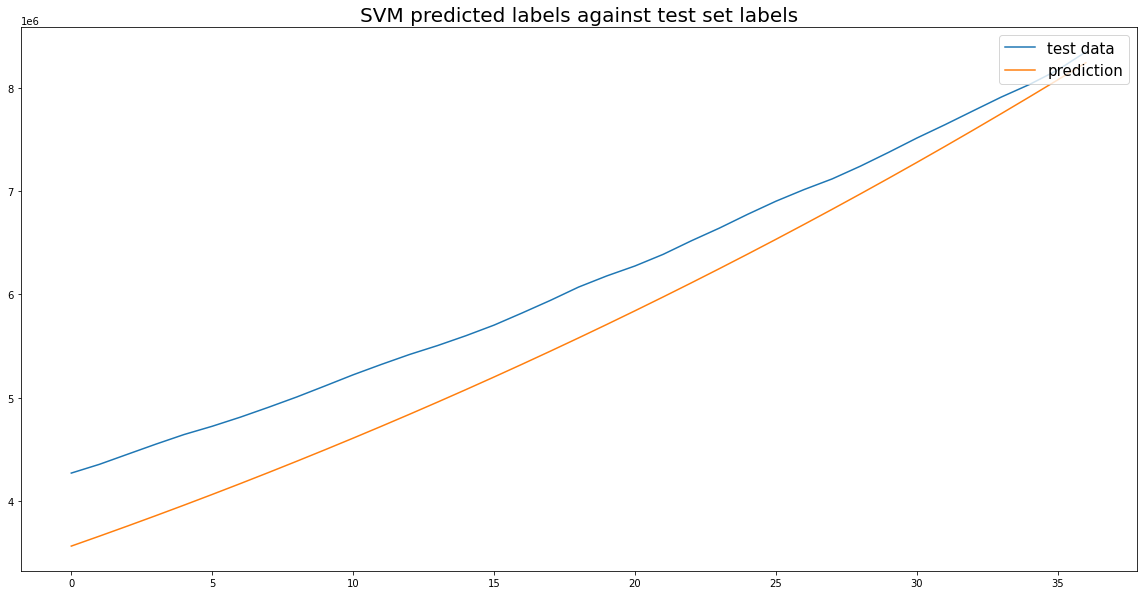

In [72]:
plt.figure(figsize=(20,10))

plt.title('SVM predicted labels against test set labels', fontsize=20)
plt.plot(yTest_confirmed)
plt.plot(y_test_pred_svm)

plt.legend(['test data', 'prediction'], loc='upper right', fontsize=15)